#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer

#### Loading the Datasets

In [2]:
df = pd.read_excel('D:\SEM 4\\astrotrain.xlsx')

In [27]:
df

,SUBSURVEY,SNID,IAUC,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
0,,10473255,NULL,2,53.468451,-28.349424,0.27,-9,-9,44,...,23.664705,1,1,1,1,2.378913e+00,1.384469,1.228777e+00,1.400711e+00,-9
1,,2110040,NULL,2,53.508185,-28.470810,0.27,-9,-9,50,...,24.363064,1,1,1,1,3.254097e-14,7.968017,3.885829e+00,3.697690e+00,-9
2,,9966178,NULL,2,35.077432,-6.979272,0.27,-9,-9,51,...,23.319248,1,1,1,1,5.848331e-01,0.558739,4.993262e-01,5.252323e-01,-9
3,,19732134,NULL,2,52.852204,-27.184372,0.27,-9,-9,3,...,22.917084,1,1,1,1,4.299130e+00,13.111013,1.955982e+01,3.461016e+01,-9
4,,1582526,NULL,2,36.932302,-5.248342,0.27,-9,-9,55,...,22.626780,1,1,1,1,2.718171e-01,0.285706,4.163428e-01,5.431316e-01,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,,16005072,NULL,2,40.736879,-1.961712,0.27,-9,-9,60,...,22.403696,1,1,1,1,2.884062e-01,0.663230,1.186423e+00,2.066639e+00,-9
39996,,32180995,NULL,2,52.286809,-27.336364,0.27,-9,-9,4,...,24.779268,1,1,1,1,1.663175e-14,1.023620,2.192368e+00,2.528582e+00,-9
39997,,3508417,NULL,2,54.662131,-27.642363,0.27,-9,-9,54,...,23.454807,1,1,1,1,8.707220e-15,0.335223,9.132640e-01,1.670266e+00,-9
39998,,16194817,NULL,2,53.313236,-27.079382,0.27,-9,-9,25,...,-9.000000,1,1,1,1,1.536111e-02,0.020247,2.152173e-13,2.263497e-13,-9


#### Basic EDA

In [3]:
df.shape

(40000, 82)

In [4]:
df.describe()

,SNID,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,SNTYPE,NOBS,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
count,4.000000e+04,40000.0,40000.000000,40000.000000,4.000000e+04,40000.0,40000.0,40000.00000,40000.000000,40000.000000,...,40000.000000,40000.0,40000.0,40000.0,40000.0,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.0
mean,1.676771e+07,2.0,39.835341,-19.407487,2.700000e-01,-9.0,-9.0,31.58690,113.696525,59.514675,...,22.711626,1.0,1.0,1.0,1.0,1.019355e+01,3.732287e+00,4.883576e+00,7.001202e+00,-9.0
std,9.683794e+06,0.0,14.800212,15.051050,2.646250e-13,0.0,0.0,17.43592,12.265149,24.185423,...,5.092737,0.0,0.0,0.0,0.0,4.586269e+02,6.478933e+00,7.795332e+00,1.688017e+01,0.0
min,2.354000e+03,2.0,6.392980,-44.976723,2.700000e-01,-9.0,-9.0,1.00000,101.000000,5.000000,...,-9.000000,1.0,1.0,1.0,1.0,1.006474e-32,3.767641e-33,9.054460e-14,2.553218e-14,-9.0
25%,8.367022e+06,2.0,35.716156,-28.640380,2.700000e-01,-9.0,-9.0,16.00000,101.000000,42.000000,...,22.935463,1.0,1.0,1.0,1.0,6.521853e-14,9.364567e-01,1.249910e+00,1.574110e+00,-9.0
50%,1.686448e+07,2.0,41.157764,-27.204088,2.700000e-01,-9.0,-9.0,32.00000,120.000000,60.000000,...,23.490799,1.0,1.0,1.0,1.0,5.749799e-01,1.987298e+00,2.595640e+00,3.422674e+00,-9.0
75%,2.510454e+07,2.0,52.866702,-4.633564,2.700000e-01,-9.0,-9.0,47.00000,122.000000,73.000000,...,24.060365,1.0,1.0,1.0,1.0,2.064853e+00,4.234644e+00,5.399975e+00,7.365328e+00,-9.0
max,3.359532e+07,2.0,55.512060,0.978050,2.700000e-01,-9.0,-9.0,62.00000,133.000000,223.000000,...,28.017927,1.0,1.0,1.0,1.0,6.577444e+04,5.800674e+02,2.593467e+02,1.226156e+03,-9.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBSURVEY             40000 non-null  object 
 1   SNID                  40000 non-null  int64  
 2   IAUC                  40000 non-null  object 
 3   FAKE                  40000 non-null  int64  
 4   RA                    40000 non-null  float64
 5   DECL                  40000 non-null  float64
 6   PIXSIZE               40000 non-null  float64
 7   NXPIX                 40000 non-null  int64  
 8   NYPIX                 40000 non-null  int64  
 9   CCDNUM                40000 non-null  int64  
 10  SNTYPE                40000 non-null  int64  
 11  NOBS                  40000 non-null  int64  
 12  PTROBS_MIN            40000 non-null  int64  
 13  PTROBS_MAX            40000 non-null  int64  
 14  MWEBV                 40000 non-null  float64
 15  MWEBV_ERR          

In [6]:
# Drop non-numeric columns 
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#### Calculating the NULL values 

In [7]:
numeric_df.isna().sum()

SNID                   0
FAKE                   0
RA                     0
DECL                   0
PIXSIZE                0
                      ..
SIM_GALFRAC_g          0
SIM_GALFRAC_r          0
SIM_GALFRAC_i          0
SIM_GALFRAC_z          0
SIM_SUBSAMPLE_INDEX    0
Length: 78, dtype: int64

#### Applying KNN Imputer for the missing values

In [8]:
imputer = KNNImputer()
imputed_data = imputer.fit_transform(numeric_df)

In [9]:
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)

In [10]:
imputed_df

,SNID,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,SNTYPE,NOBS,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
0,10473255.0,2.0,53.468451,-28.349424,0.27,-9.0,-9.0,44.0,133.0,61.0,...,23.664705,1.0,1.0,1.0,1.0,2.378913e+00,1.384469,1.228777e+00,1.400711e+00,-9.0
1,2110040.0,2.0,53.508185,-28.470810,0.27,-9.0,-9.0,50.0,101.0,69.0,...,24.363064,1.0,1.0,1.0,1.0,3.254097e-14,7.968017,3.885829e+00,3.697690e+00,-9.0
2,9966178.0,2.0,35.077432,-6.979272,0.27,-9.0,-9.0,51.0,122.0,65.0,...,23.319248,1.0,1.0,1.0,1.0,5.848331e-01,0.558739,4.993262e-01,5.252323e-01,-9.0
3,19732134.0,2.0,52.852204,-27.184372,0.27,-9.0,-9.0,3.0,120.0,34.0,...,22.917084,1.0,1.0,1.0,1.0,4.299130e+00,13.111013,1.955982e+01,3.461016e+01,-9.0
4,1582526.0,2.0,36.932302,-5.248342,0.27,-9.0,-9.0,55.0,101.0,65.0,...,22.626780,1.0,1.0,1.0,1.0,2.718171e-01,0.285706,4.163428e-01,5.431316e-01,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,16005072.0,2.0,40.736879,-1.961712,0.27,-9.0,-9.0,60.0,101.0,46.0,...,22.403696,1.0,1.0,1.0,1.0,2.884062e-01,0.663230,1.186423e+00,2.066639e+00,-9.0
39996,32180995.0,2.0,52.286809,-27.336364,0.27,-9.0,-9.0,4.0,121.0,59.0,...,24.779268,1.0,1.0,1.0,1.0,1.663175e-14,1.023620,2.192368e+00,2.528582e+00,-9.0
39997,3508417.0,2.0,54.662131,-27.642363,0.27,-9.0,-9.0,54.0,121.0,32.0,...,23.454807,1.0,1.0,1.0,1.0,8.707220e-15,0.335223,9.132640e-01,1.670266e+00,-9.0
39998,16194817.0,2.0,53.313236,-27.079382,0.27,-9.0,-9.0,25.0,101.0,7.0,...,-9.000000,1.0,1.0,1.0,1.0,1.536111e-02,0.020247,2.152173e-13,2.263497e-13,-9.0


In [11]:
imputed_df.isna().sum()

SNID                   0
FAKE                   0
RA                     0
DECL                   0
PIXSIZE                0
                      ..
SIM_GALFRAC_g          0
SIM_GALFRAC_r          0
SIM_GALFRAC_i          0
SIM_GALFRAC_z          0
SIM_SUBSAMPLE_INDEX    0
Length: 78, dtype: int64

In [12]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 78 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SNID                  40000 non-null  float64
 1   FAKE                  40000 non-null  float64
 2   RA                    40000 non-null  float64
 3   DECL                  40000 non-null  float64
 4   PIXSIZE               40000 non-null  float64
 5   NXPIX                 40000 non-null  float64
 6   NYPIX                 40000 non-null  float64
 7   CCDNUM                40000 non-null  float64
 8   SNTYPE                40000 non-null  float64
 9   NOBS                  40000 non-null  float64
 10  PTROBS_MIN            40000 non-null  float64
 11  PTROBS_MAX            40000 non-null  float64
 12  MWEBV                 40000 non-null  float64
 13  MWEBV_ERR             40000 non-null  float64
 14  REDSHIFT_HELIO        40000 non-null  float64
 15  REDSHIFT_HELIO_ERR 

In [13]:
imputed_df.shape

(40000, 78)

#### Applying PCA

In [14]:
X = imputed_df.drop(columns=['SNTYPE'])
y = imputed_df['SNTYPE']

- Scaling is important before applying PCA because PCA is sensitive to the scale of the features. Standardizing the data ensures that all features contribute equally to the principal components by removing differences in scale and variance. This prevents features with larger scales from dominating the principal components solely due to their magnitude.

In [15]:
# Applying scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [16]:
covariance_matrix=np.cov(scaled_df.T)
covariance_matrix

array([[ 1.000025  ,  0.        , -0.00867679, ...,  0.00171772,
         0.00619939,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00867679,  0.        ,  1.000025  , ...,  0.06796219,
         0.03394461,  0.        ],
       ...,
       [ 0.00171772,  0.        ,  0.06796219, ...,  1.000025  ,
         0.68044125,  0.        ],
       [ 0.00619939,  0.        ,  0.03394461, ...,  0.68044125,
         1.000025  ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [17]:
eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)

In [18]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print("Eigenvalues arranges in descending order:")
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranges in descending order:
13.999324985171544
5.0993564496914745
4.440383096561586
3.5143205006428753
3.0198207680681968
2.06889310264612
2.0525429043048433
1.9213621311080558
1.776879245264435
1.6654276250587945
1.2778989357138586
1.068144244032003
1.0217833641884482
1.0247318950142388
1.0119221662055864
0.9948728345394715
0.9826595229717319
0.9877704656493418
0.9434497396995335
0.9163080519994189
0.7528178956728229
0.6232207517751004
0.5565620104400352
0.45822696543759106
0.4373325020832928
0.41029315348408174
0.3406010867467103
0.2884739444402008
0.24562620390048515
0.229318935929095
0.20098031224869226
0.1586710373422772
0.15346738886232936
0.10826503150762654
0.09042880441820517
0.048492253485854404
0.03379438982462148
0.027292721721235425
0.022118320463043302
0.01529361162640547
0.004384946781465971
0.0037519536725110444
0.0027426566961560586
0.0010831777640479619
0.0001914263555457602
8.578491762974671e-05
5.694197667308865e-06
4.365474650121751e-08
3.952362922487

In [46]:
pca=PCA()
pca=pca.fit(scaled_df)
explained_variance=pca.explained_variance_ratio_

In [47]:
explained_variance

array([2.54526818e-01, 9.27132539e-02, 8.07322198e-02, 6.38951390e-02,
       5.49044595e-02, 3.76152978e-02, 3.73180289e-02, 3.49329836e-02,
       3.23060877e-02, 3.02797453e-02, 2.32339452e-02, 1.94203189e-02,
       1.86310232e-02, 1.85774149e-02, 1.83981249e-02, 1.80881448e-02,
       1.79590140e-02, 1.78660901e-02, 1.71532028e-02, 1.66597299e-02,
       1.36872559e-02, 1.13310031e-02, 1.01190563e-02, 8.33119109e-03,
       7.95130125e-03, 7.45968902e-03, 6.19259221e-03, 5.24484968e-03,
       4.46581933e-03, 4.16933096e-03, 3.65409614e-03, 2.88485583e-03,
       2.79024640e-03, 1.96840591e-03, 1.64411898e-03, 8.81655294e-04,
       6.14428090e-04, 4.96218898e-04, 4.02141227e-04, 2.78058714e-04,
       7.97243120e-05, 6.82156341e-05, 4.98652387e-05, 1.96936488e-05,
       3.48039217e-06, 1.55968678e-06, 1.03528278e-07, 7.93702891e-10,
       7.18590585e-12, 4.39492601e-17, 3.45816983e-17, 1.21337333e-17,
       5.01965641e-32, 1.81023786e-32, 6.29698714e-33, 4.19755229e-33,
      

In [48]:
len(explained_variance)

77

In [49]:
df1 = pd.DataFrame({'Principal Component': ['PC{}'.format(i+1) for i in range(len(eigen_values))],
                    'Variance': explained_variance})

In [50]:
df1

,Principal Component,Variance
0,PC1,2.545268e-01
1,PC2,9.271325e-02
2,PC3,8.073222e-02
3,PC4,6.389514e-02
4,PC5,5.490446e-02
...,...,...
72,PC73,1.174922e-33
73,PC74,1.174922e-33
74,PC75,1.174922e-33
75,PC76,1.018675e-33


- Principal Component Analysis (PCA) is utilized here to reduce the dimensionality of the data while preserving the maximum variance. By transforming the data into a lower-dimensional space represented by the principal components, PCA enables efficient visualization and analysis. In this case, with n_components=3, PCA captures the most significant patterns in the data while reducing it to three dimensions, aiding in simplifying complexity and retaining essential information.

In [20]:
pca=PCA(n_components=0.95)
pca=pca.fit(scaled_df)
pca_d=pca.transform(X)

C:\Users\ramit\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


#### Dividing the dataset into train and test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(pca_d, y, test_size=0.2, random_state=42)

#### Applying Supervised Classification Model

In [23]:
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.44975

#### Without PCA

In [24]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_1)
X_test_std = scaler.transform(X_test_1)

In [26]:
model_svm_1 = SVC(random_state=42)
model_svm_1.fit(X_train_std, y_train)
y_pred_svm_1= model_svm_1.predict(X_test_std)
accuracy_svm_1 = accuracy_score(y_test, y_pred_svm_1)
accuracy_svm_1

0.99425

#### Visualisations

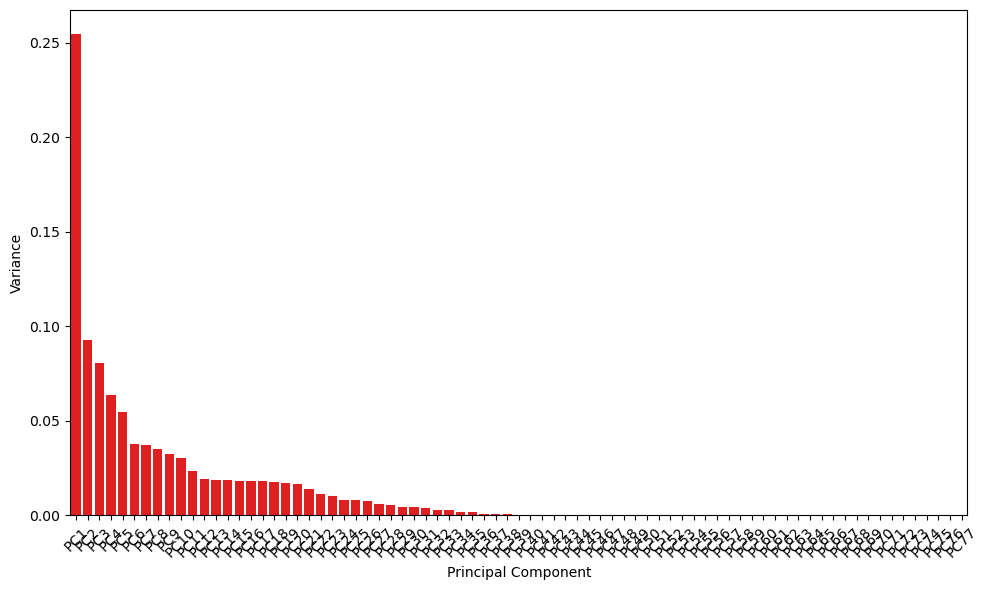

In [61]:
plt.figure(figsize=(10, 6))  
sns.barplot(x='Principal Component', y='Variance', data=df1, color="r")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

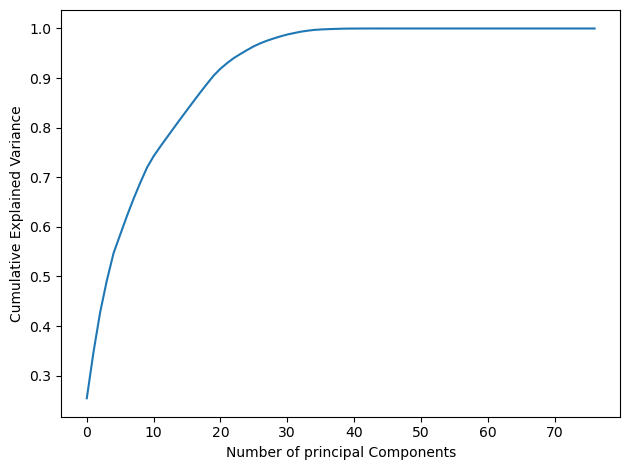

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
plt.show()